# Basit Doğrusal Regresyon

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
d = {
    "motor_hacmi": [110, 125, 250, 500, 600, 650, 750, 800, 1000, 1200],
    "satis_fiyati": [14800, 19700, 29900, 48500, 75000, 63700, 58300, 82500, 103900, 120900]
}

In [14]:
df  = pd.DataFrame(data=d)

In [15]:
df

,motor_hacmi,satis_fiyati
0,110,14800
1,125,19700
2,250,29900
3,500,48500
4,600,75000
5,650,63700
6,750,58300
7,800,82500
8,1000,103900
9,1200,120900


In [16]:
df.describe()

,motor_hacmi,satis_fiyati
count,10.000000,10.000000
mean,598.500000,61720.000000
std,362.583707,35054.966362
min,110.000000,14800.000000
25%,312.500000,34550.000000
50%,625.000000,61000.000000
75%,787.500000,80625.000000
max,1200.000000,120900.000000


In [17]:
df.corr()

,motor_hacmi,satis_fiyati
motor_hacmi,1.000000,0.974982
satis_fiyati,0.974982,1.000000


Text(0, 0.5, 'Satış Fiyatı')

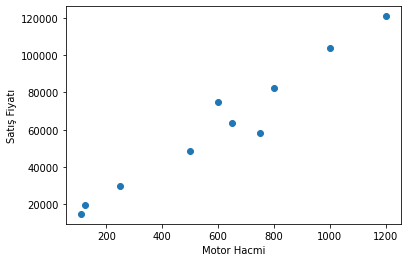

In [19]:
plt.scatter(df["motor_hacmi"], df["satis_fiyati"])

plt.xlabel("Motor Hacmi")
plt.ylabel("Satış Fiyatı")


In [26]:
X = df[["motor_hacmi"]]
y = df[["satis_fiyati"]]

In [27]:
X

,motor_hacmi
0,110
1,125
2,250
3,500
4,600
5,650
6,750
7,800
8,1000
9,1200


In [28]:
y

,satis_fiyati
0,14800
1,19700
2,29900
3,48500
4,75000
5,63700
6,58300
7,82500
8,103900
9,120900


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# y = w*x + b
reg = LinearRegression()
reg.fit(X_train, y_train)

w = reg.coef_[0][0]
b = reg.intercept_[0]

print("Slope (Eğim): ", w)
print("Intercept (Kesişme): ", b)

Slope (Eğim):  93.71009220347489
Intercept (Kesişme):  4771.118986389003


Text(0, 0.5, 'Satış Fiyatı')

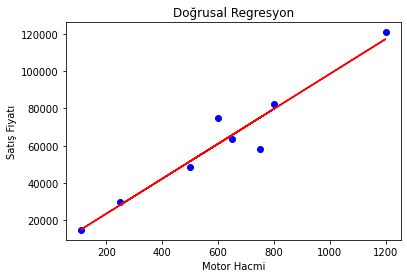

In [35]:
plt.title("Doğrusal Regresyon")

#gozlem noktalari
plt.scatter(X_train.motor_hacmi, y_train.satis_fiyati, color="b")

#denklem
plt.plot(X_train, w*X_train + b, '-r')

plt.xlabel("Motor Hacmi")
plt.ylabel("Satış Fiyatı")

In [40]:
y_test_pred = reg.predict(X_test)


print("Mean absolute error - Ortalama mutlak hata:", np.mean(np.absolute(y_test_pred - y_test)))
print("\n")
print("Mean squared error (MSE) - ortalama kare hatası:", np.mean( (y_test_pred - y_test)**2 ))
print("\n")
print("R2 score:", r2_score(y_test_pred, y_test))

Mean absolute error - Ortalama mutlak hata: satis_fiyati    4316.954149
dtype: float64


Mean squared error (MSE) - ortalama kare hatası: satis_fiyati    1.985013e+07
dtype: float64


R2 score: 0.988190416795963


In [41]:
def predict_price(x):
  price = x*w + b
  return price

In [42]:
predict_price(999)

98387.50109766041